In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import sqlite3

import matplotlib.pyplot as plt

In [2]:
def make_bar_graph(x, y, x_label, y_label, title, img_num = 0):
    plt.title(title)
    plt.bar(x, y, linewidth = 0)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.text(max(x) * .8, max(y) * .9, "Image " + str(img_num), fontsize=15)
    plt.show()    

##Looking at number of sentences in Editors Picks vs All Comments##

In [3]:
comments_db = sqlite3.connect("../john_test_4.db") # Create symbolic link to db you want to query.
cursor = comments_db.cursor()
cursor.execute("""
                SELECT n_sentences, COUNT(*) 
                FROM Features
                GROUP BY n_sentences
                """)
all_rows = cursor.fetchall()
comments_db.commit()
cursor.close()
n_sentence_list_all_comments = [x[1] for x in all_rows]

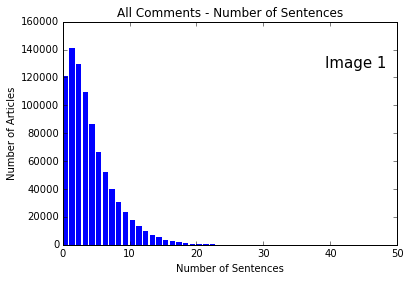

In [4]:
x = range(len(n_sentence_list_all_comments))
y = n_sentence_list_all_comments
make_bar_graph(x, y, 'Number of Sentences', 'Number of Articles', 'All Comments - Number of Sentences', 1)


In [5]:
cursor = comments_db.cursor()
cursor.execute("""
                SELECT n_sentences, COUNT(*) 
                FROM Features
                WHERE EditorSelection = 1
                GROUP BY n_sentences
                """)
all_rows = cursor.fetchall()
comments_db.commit()
cursor.close()
n_sentence_list_editors_picks = [x[1] for x in all_rows]


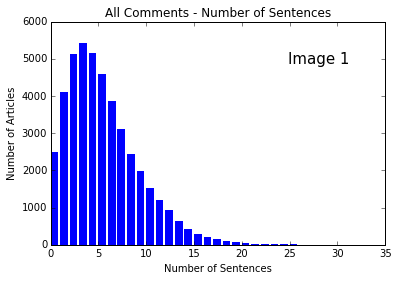

In [6]:
x = range(len(n_sentence_list_editors_picks))
y = n_sentence_list_editors_picks
make_bar_graph(x, y, 'Number of Sentences', 'Number of Articles', 'All Comments - Number of Sentences', 1)


In [7]:
columns = ["CommentID", "EditorSelection", "subjectivity", "PRP$", "perc_5_char_words", "perc_3_char_words", "God", "perc_8_char_words", "perc_2_char_words", "WDT", "PhD", "perc_15_char_words", "perc_10_char_words", "VBN", "JJ", "WP", "perc_16_char_words", "DT", "perc_18_char_words", "n_sentences", "Disagree", "n_18_char_words", "perc_1_char_words", "avg_word_len", "perc_20_char_words", "n_8_char_words", "NN", "perc_14_char_words", "n_10_char_words", "n_16_char_words", "MD", "perc_11_char_words", "perc_17_char_words", "perc_13_char_words", "perc_4_char_words", "n_periods", "starts_with_I", "RB", "avg_sentence_len", "n_17_char_words", "n_15_char_words", "NNS", "n_exclamations", "n_12_char_words", "words_per_sentence", "polarity", "VB", "n_1_char_words", "n_13_char_words", "CC", "perc_19_char_words", "n_2_char_words", "PRP", "n_7_char_words", "RBR", "perc_6_char_words", "n_chars", "n_upper", "n_words", "president", "VBP", "CD", "Agree", "perc_12_char_words", "Obama", "n_11_char_words", "VBG", "JJS", "n_9_char_words", "n_6_char_words", "n_4_char_words", "n_questions", "n_14_char_words", "NNP", "n_20_char_words", "perc_9_char_words", "n_5_char_words", "perc_7_char_words", "n_3_char_words", "VBZ", "n_19_char_words", "n_novel_tags", "WRB", "JJR", "RP", "UH", "VBD", "POS", "EX", "RBS", "PDT", "WP$", "NNPS", "FW", "LS"]

In [8]:
for col in columns:
    print col

CommentID
EditorSelection
subjectivity
PRP$
perc_5_char_words
perc_3_char_words
God
perc_8_char_words
perc_2_char_words
WDT
PhD
perc_15_char_words
perc_10_char_words
VBN
JJ
WP
perc_16_char_words
DT
perc_18_char_words
n_sentences
Disagree
n_18_char_words
perc_1_char_words
avg_word_len
perc_20_char_words
n_8_char_words
NN
perc_14_char_words
n_10_char_words
n_16_char_words
MD
perc_11_char_words
perc_17_char_words
perc_13_char_words
perc_4_char_words
n_periods
starts_with_I
RB
avg_sentence_len
n_17_char_words
n_15_char_words
NNS
n_exclamations
n_12_char_words
words_per_sentence
polarity
VB
n_1_char_words
n_13_char_words
CC
perc_19_char_words
n_2_char_words
PRP
n_7_char_words
RBR
perc_6_char_words
n_chars
n_upper
n_words
president
VBP
CD
Agree
perc_12_char_words
Obama
n_11_char_words
VBG
JJS
n_9_char_words
n_6_char_words
n_4_char_words
n_questions
n_14_char_words
NNP
n_20_char_words
perc_9_char_words
n_5_char_words
perc_7_char_words
n_3_char_words
VBZ
n_19_char_words
n_novel_tags
WRB
JJR
RP

##Computing Basic Statistics on our DB##

In [9]:
#Given a query such as "Select count(*) from Comments", returns the single number value
def get_count_from_query(query_text):
    cursor = comments_db.cursor()
    cursor.execute(query_text)
    all_rows = cursor.fetchall()
    comments_db.commit()
    cursor.close()
    return all_rows[0][0]


In [10]:
num_comments = get_count_from_query("""
                        SELECT COUNT(*) 
                        FROM Features
                        """)
print num_comments

866388


In [11]:
num_editor_selections = get_count_from_query("""
                        SELECT COUNT(*) 
                        FROM Features
                        WHERE EditorSelection = 1
                        """)
print num_editor_selections

43979


In [12]:
print num_editor_selections/float(num_comments)

0.0507613217173


##Looking at PhD mentions in all comments vs Editors Picks##

In [13]:
num_phd_total = get_count_from_query("""
                SELECT COUNT(*) 
                FROM Features
                WHERE PhD = 1
                """)
print num_phd_total

1353


In [14]:
num_phd_editor_selections = get_count_from_query("""
                SELECT COUNT(*) 
                FROM Features
                WHERE EditorSelection = 1 AND PhD = 1
                """)
print num_phd_editor_selections

105


In [15]:
print float(num_phd_editor_selections)/num_phd_total

0.0776053215078


In [16]:
##TODO: Chi Squared to see if PhD is statistically significant##
##b/c 7.7% is higher than 5%, but does it matter with a small sample?##

##Agree vs Disagree##

In [28]:
num_agree_total = get_count_from_query("""
                SELECT COUNT(*) 
                FROM Features
                WHERE God = 1
                """)
print num_agree_total

16657


In [26]:
num_disagree_total = get_count_from_query("""
                SELECT COUNT(*) 
                FROM Features
                WHERE Obama = 1 AND EditorSelection = 1
                """)
print num_disagree_total

49


In [ ]:
    cursor = comments_db.cursor()
    cursor.execute("""
                SELECT CommentText  
                FROM Comments JOIN Features
                WHERE Disagree = 1
                """)
    all_rows = cursor.fetchall()
    comments_db.commit()
    cursor.close()
    print all_rows